In [124]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = []

for file in os.listdir('data'):
    user_data = json.load(open('data/' + file, 'r'))
    data.append(user_data)

In [388]:
data[4][24]

{'rt': 3856.7549999988696,
 'stimulus': ['videos/scene_050.mp4'],
 'response': 1,
 'scene_dir': 'scene_050',
 'answer': 1,
 'gt_params': [2.95, 0.91],
 'distractor_params': [1.21, 0.77],
 'distance': 3.047200000000001,
 'trial_type': 'video-button-response',
 'trial_index': 24,
 'time_elapsed': 228576,
 'internal_node_id': '0.0-24.0',
 'correct': True}

In [386]:
phases = 0
for i, row in enumerate(data[0]):
    if row.get('trial_type') == 'video-button-response':
        phases += 1
print(phases)
    

60


In [389]:
def get_phase(row, phase_opts=['White', 'Static Dots', 'Moving Dots']):
    scene_dir = row.get('scene_dir')
    if not scene_dir:
        return
    scene = int(scene_dir.split('_')[1])
    return phase_opts[int(scene / 50)]

def get_stats(data, examples_per_phase=20):
    rt = []
    correct = []
    difficulty = []
    phase = []
    for i, row in enumerate(data[3:]):
        if row.get('trial_type') == 'video-button-response':

            rt.append(row.get('rt'))
            correct.append(row.get('correct'))
            gt = row.get('gt_params')
            dsc = row.get('distractor_params')
            distance = np.sqrt((gt[0] - dsc[0])**2 + (gt[1]-dsc[1])**2)
            difficulty.append(distance)
            phase.append(get_phase(row))
            
    return rt, correct, difficulty, phase

David


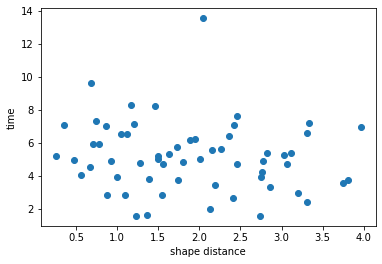

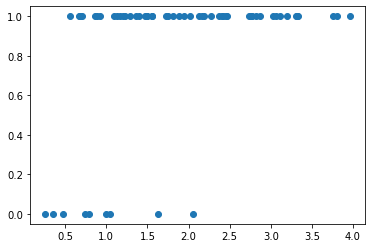

amir


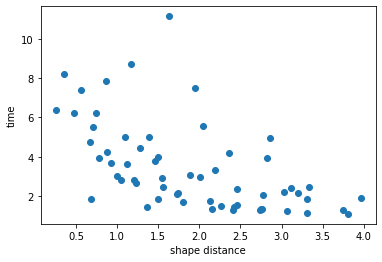

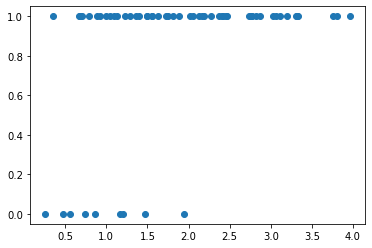

Peter Tilton


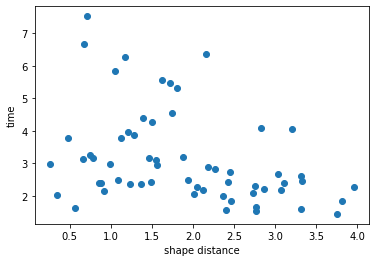

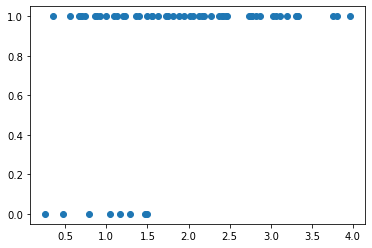

cynthia


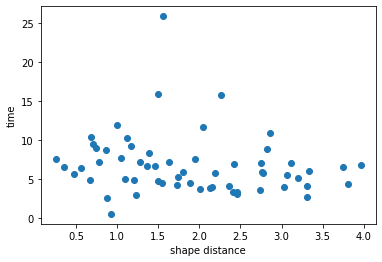

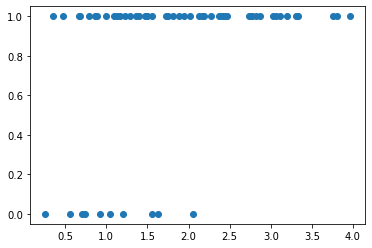

TS


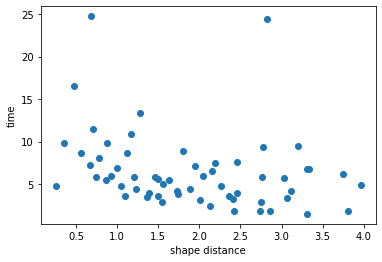

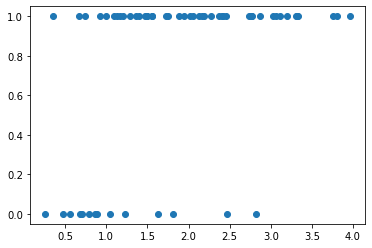

marta


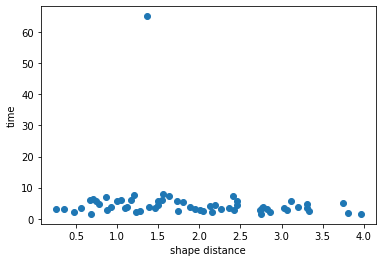

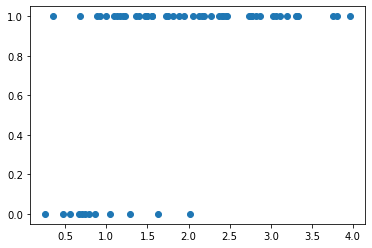

Halely


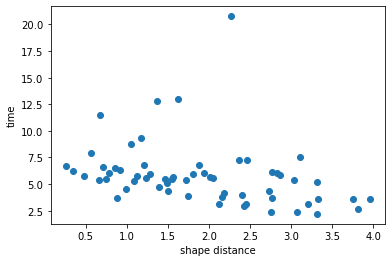

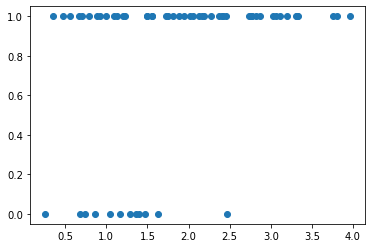

Meged Eisenberg


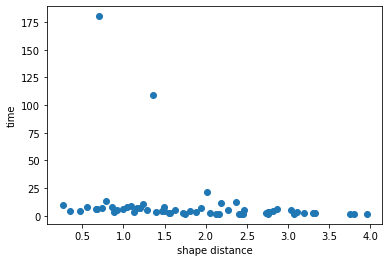

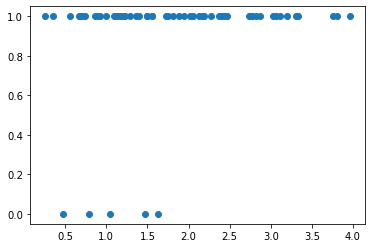

Juaquin


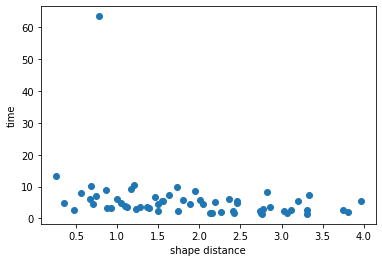

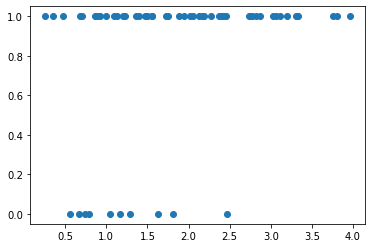

nechama frenkel


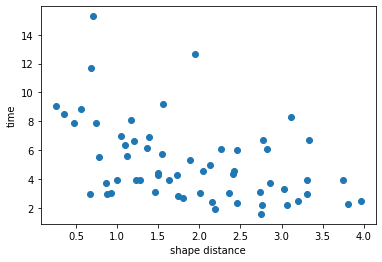

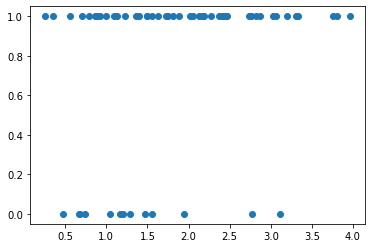

anu


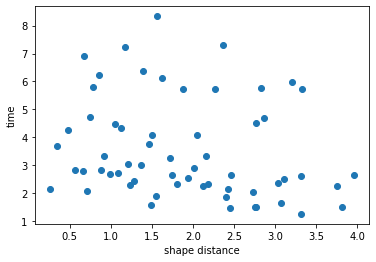

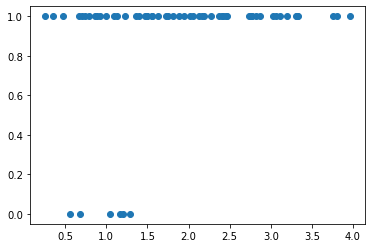

Muhammad Arif


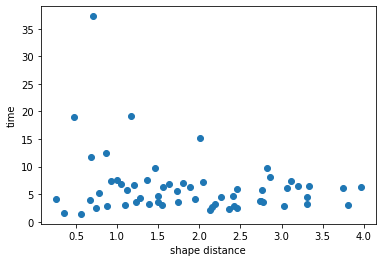

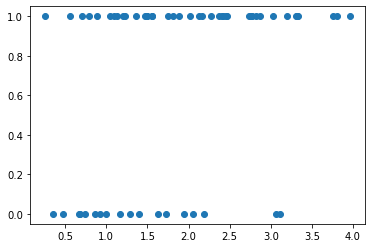

In [390]:
rts = []
corrects = []
phases = []
difficulties = []

for user in data:
    print(user[1]['response']['user_id'])
    rt, correct, difficulty, phase = get_stats(user)
    phases.append(phase)
    rts.append(rt)
    corrects.append(correct)
    difficulties.append(difficulty)
    
    plt.scatter(difficulty, [x/1000 for x in rt])
    plt.xlabel('shape distance')
    plt.ylabel('time')
    plt.show()
    
    plt.scatter(difficulty, correct)
    plt.show()

In [391]:
all_rts = np.concatenate([rts], axis=0).flatten() / 1000
all_corrects = np.concatenate([corrects], axis=0).flatten()
difficulties = np.array(difficulties).flatten()
all_phases = np.array(phases).flatten()

In [392]:
import scipy.stats as sps

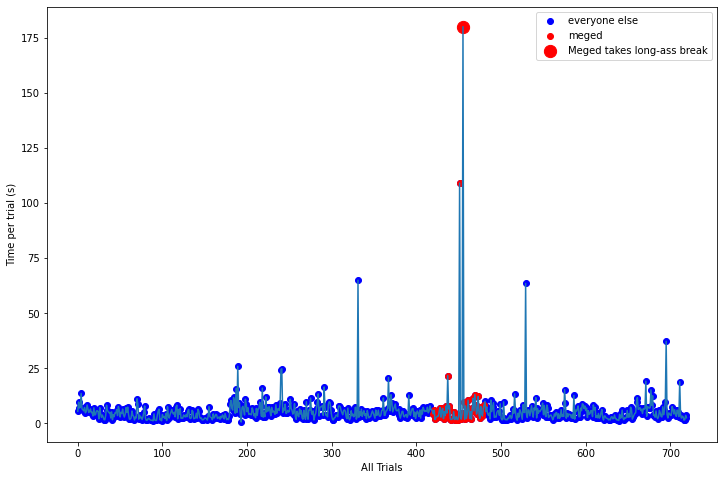

In [394]:
fig = plt.figure(figsize=(12, 8))
plt.plot(all_rts)
plt.scatter(range(all_rts.shape[0]),all_rts, color='blue', label='everyone else')
plt.scatter(np.arange(60*7, 60*8 + 1, 1), all_rts[np.arange(60*7, 60*8 + 1, 1)], color='red', label='meged')
plt.scatter(np.where(all_rts == max(all_rts)), max(all_rts), color='red', s=150, label='Meged takes long-ass break')
plt.ylabel('Time per trial (s)')
plt.xlabel('All Trials')
plt.legend()
plt.show()

In [395]:
np.sum(all_corrects) / (60 * 12)

0.825

In [396]:
np.mean(all_rts), np.std(all_rts)

(5.539307687499719, 8.845305159255853)

Text(0, 0.5, 'Response Time (s)')

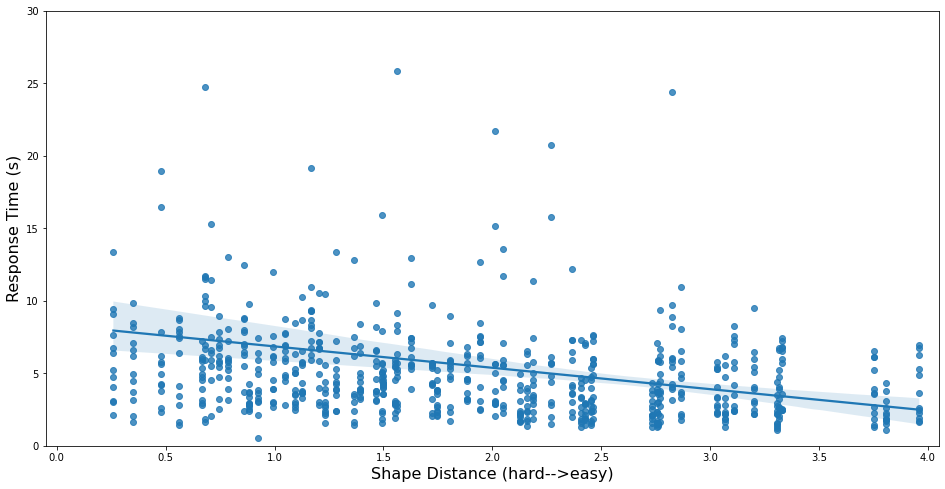

In [397]:
fig = plt.figure(figsize=(16,8))
sns.regplot(x=difficulties, y=all_rts, order=1)
plt.ylim(0, 30)
plt.xlim(-0.05, 4.05)
plt.xlabel('Shape Distance (hard-->easy)', fontsize=16)
plt.ylabel('Response Time (s)', fontsize=16)


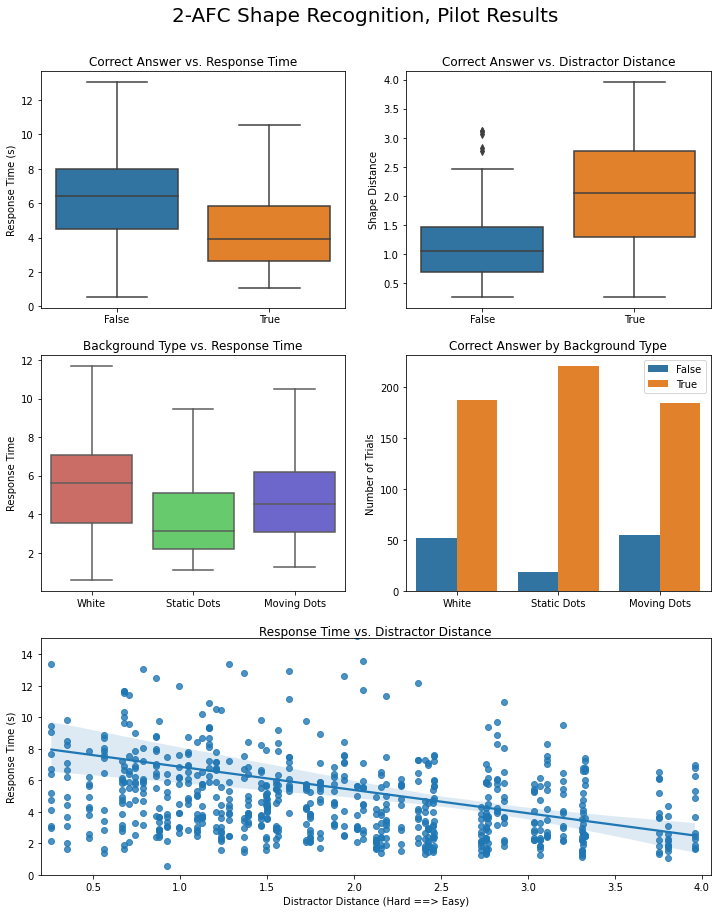

<Figure size 1152x576 with 0 Axes>

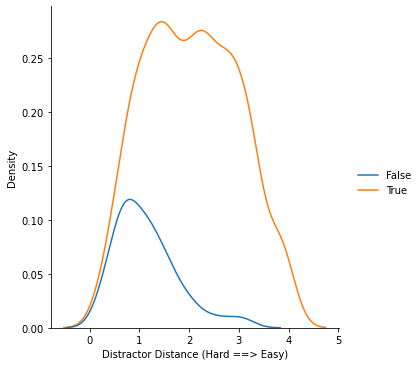

In [442]:
fig, axs = plt.subplots(1,4, figsize=(12,20), sharey=False, sharex=False)

ax1 = plt.subplot(421)
sns.boxplot(x=all_corrects, y=all_rts, ax=ax1, showfliers=False)
ax1.set_ylabel('Response Time (s)')
#ax1.set_xlabel('Correct Answer')
ax1.set_title('Correct Answer vs. Response Time')

ax2 = plt.subplot(422)
sns.boxplot(x=all_corrects, y=difficulties, ax=ax2)
ax2.set_ylabel('Shape Distance')
#ax2.set_xlabel('Correct Answer')
ax2.set_title('Correct Answer vs. Distractor Distance')

ax3 = plt.subplot(423)
sns.boxplot(x=all_phases, y=all_rts, ax=ax3, palette='hls', showfliers=False)
ax3.set_ylabel('Response Time')
#ax3.set_xlabel('Background Type')
ax3.set_title('Background Type vs. Response Time')

ax4 = plt.subplot(424)
sns.countplot(x=all_phases, hue=all_corrects, ax=ax4)
ax4.set_ylabel('Number of Trials')
#ax4.set_xlabel('Background Type')
ax4.set_title('Correct Answer by Background Type')

ax5 = plt.subplot(4, 2, (5,6))
sns.regplot(x=difficulties, y=all_rts, ax=ax5)
ax5.set_ylim(0, 15)
ax5.set_xlim(0.2, 4.05)
ax5.set_xlabel('Distractor Distance (Hard ==> Easy)')
ax5.set_ylabel('Response Time (s)')
ax5.set_title('Response Time vs. Distractor Distance', pad=-5)
plt.suptitle('2-AFC Shape Recognition, Pilot Results', y=0.925, fontsize=20)

plt.show()


fig = plt.figure(figsize=(16,8))
sns.displot(x=difficulties, hue=all_corrects, kind='kde')
plt.xlabel('Distractor Distance (Hard ==> Easy)')

#ax4 = plt.subplot(113)
#ax4.boxplot(phases, corrects)

plt.show()